In [62]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight')

In [63]:
#Import Dataset
df_life = pd.read_csv(r'/Users/brittanyfreese/Documents/Career Foundry/Life Expectancy/lifedata.csv', index_col = False)

In [64]:
#Check dataset head
df_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1/1/15,Developing,65.0,263.0,62,0.01,71.27962362,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,1/1/14,Developing,59.9,271.0,64,0.01,73.52358168,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,1/1/13,Developing,59.9,268.0,66,0.01,73.21924272,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,1/1/12,Developing,59.5,272.0,69,0.01,78.1842153,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,1/1/11,Developing,59.2,275.0,71,0.01,7.097108703,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [65]:
#Create subset dataframe for necessary variabless
df_lifesubset = df_life[['Country', 'Year', 'Life expectancy ']]

In [66]:
#Check the head of new dataframe
df_lifesubset.head()

,Country,Year,Life expectancy
0,Afghanistan,1/1/15,65.0
1,Afghanistan,1/1/14,59.9
2,Afghanistan,1/1/13,59.9
3,Afghanistan,1/1/12,59.5
4,Afghanistan,1/1/11,59.2


In [67]:
#Create another subet for just the United States
is_US =  df_lifesubset['Country']== 'United States of America'

In [68]:
df_lifeus = df_lifesubset[is_US]

In [69]:
#Check the head of new dataframe
df_lifeus.head()

,Country,Year,Life expectancy
2794,United States of America,1/1/15,79.3
2795,United States of America,1/1/14,79.1
2796,United States of America,1/1/13,78.9
2797,United States of America,1/1/12,78.8
2798,United States of America,1/1/11,78.7


In [70]:
#Check data types
df_lifeus.dtypes

Country              object
Year                 object
Life expectancy     float64
dtype: object

In [71]:
#Datetime 
from datetime import datetime
df_lifeus['Date'] = pd.to_datetime(df_lifeus['Year'])
df_lifeus = df_lifeus.set_index('Date') # Set the datetime as the index of the dataframe.
df_lifeus.drop(['Year'], axis=1, inplace=True) # Drop the "Date" column.
df_lifeus.head()

,Country,Life expectancy
Date,,
2015-01-01,United States of America,79.3
2014-01-01,United States of America,79.1
2013-01-01,United States of America,78.9
2012-01-01,United States of America,78.8
2011-01-01,United States of America,78.7


In [72]:
#Ensure Date is the Index
df_lifeus.columns

Index(['Country', 'Life expectancy '], dtype='object')

In [73]:
#Drop Country Column, no longer necessary
df_lifeusdrop = df_lifeus.drop(columns=['Country'])

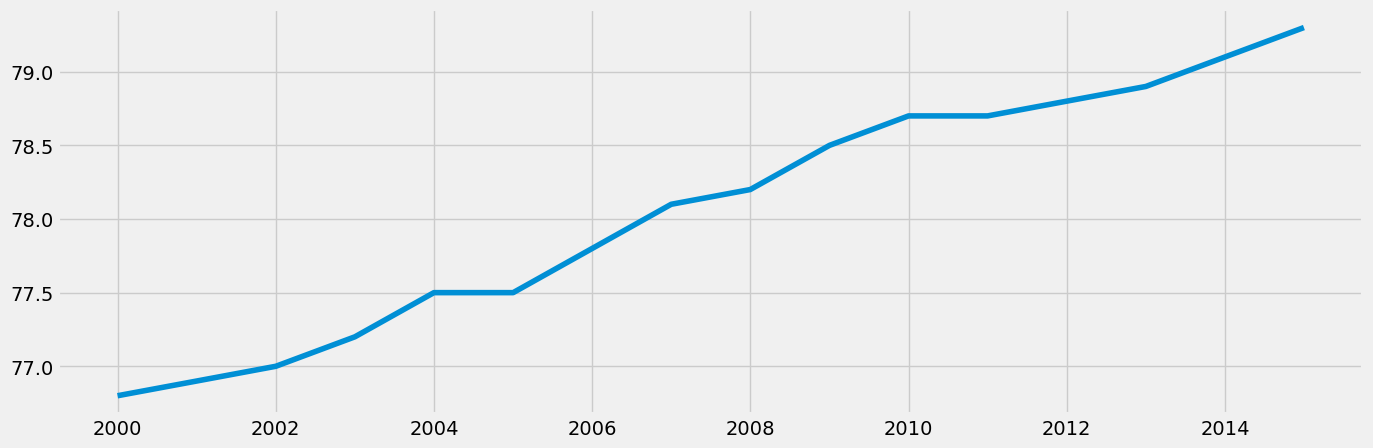

In [53]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_lifeusdrop)

I created a subset of my data to analyze just the United States data from 2000-2015.  Life expectancy has increased incrementally in the United States each year.

In [74]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_lifeusdrop, model='additive')

In [75]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

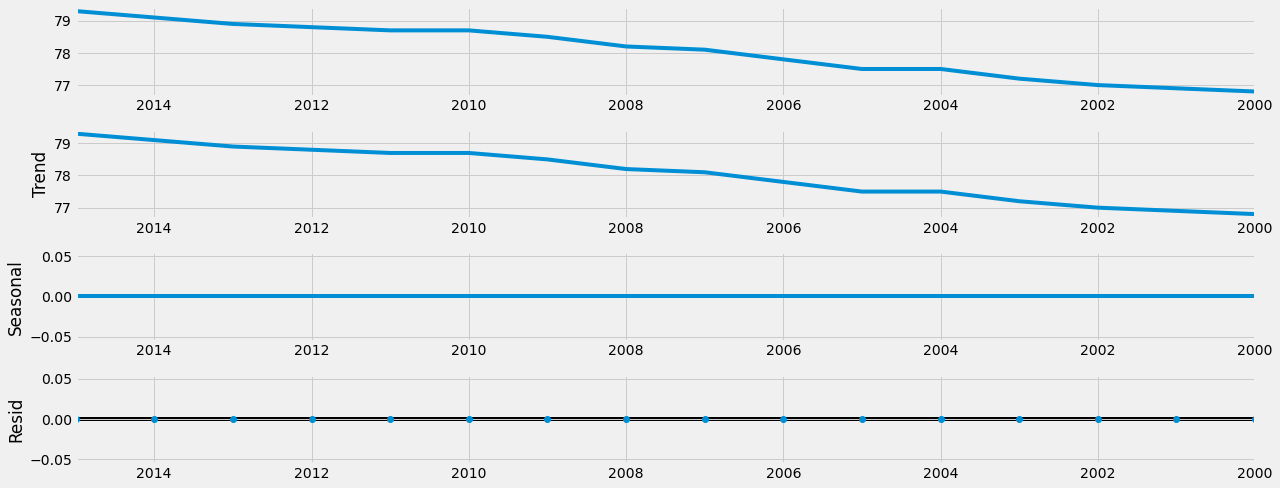

In [76]:
decomposition.plot()
plt.show()

The data does not have much noise, so is pretty straight forward.  There is no seasonality because the dates are just yearly dates without months. Life expectancy is not measured based on months or seasons.

In [81]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_lifeusdrop['Life expectancy '])

Dickey-Fuller Stationarity test:
Test Statistic                -0.058406
p-value                        0.953427
Number of Lags Used            6.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


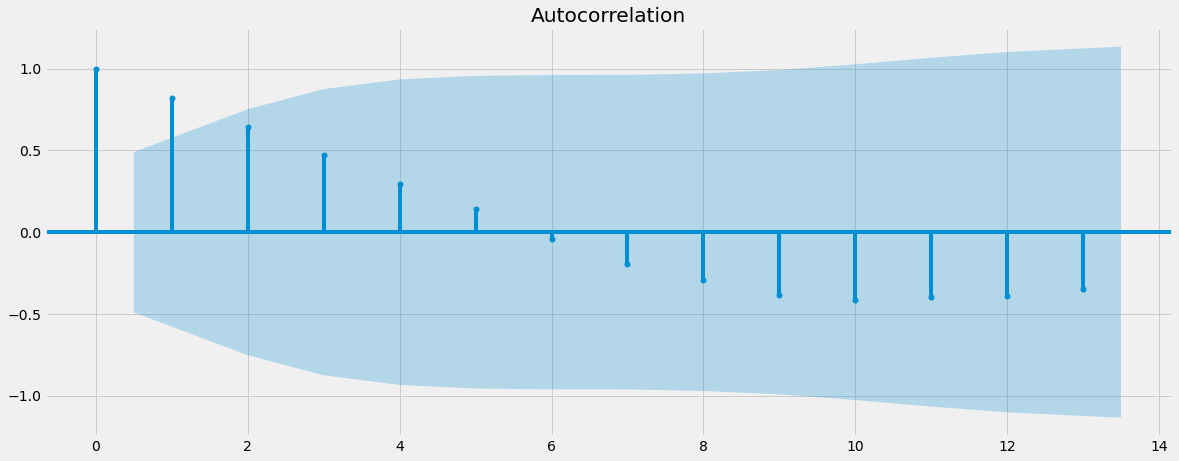

In [82]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(df_lifeusdrop)
plt.show()

This test appears to be stationary.